# Iris Dataset — EDA and Analysis
This notebook loads the synthetic Iris dataset, performs exploratory data analysis (EDA).

**Contents:**
- Environment & imports
- Data loading and quick inspection
- Exploratory visualization
- Next steps for preprocessing and modeling

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

**Import data set as df**

In [81]:
# Load dataset
DATA_PATH = 'iris_synthetic_data.csv'
df = pd.read_csv(DATA_PATH)
print(f'Loaded: {DATA_PATH} (rows={df.shape[0]}, cols={df.shape[1]})')
df.head()

Loaded: iris_synthetic_data.csv (rows=3000, cols=7)


,sepal length,sepal width,petal length,petal width,sepal area,petal area,label
0,5.2,3.8,1.5,0.3,19.76,0.45,Iris-setosa
1,5.3,4.1,1.5,0.1,21.73,0.15,Iris-setosa
2,4.8,3.1,1.5,0.2,14.88,0.30,Iris-setosa
3,5.2,3.7,1.5,0.2,19.24,0.30,Iris-setosa
4,4.9,3.0,1.5,0.3,14.70,0.45,Iris-setosa


In [82]:
# Quick dataset summary
print('Info:')
df.info()

print('Describe (numeric):')
df.describe()

print('Missing values per column:')
print(df.isna().sum())

print('Duplicate rows:')
print(df.duplicated().sum())

print('Class distribution:')
print(df['label'].value_counts())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  3000 non-null   float64
 1   sepal width   3000 non-null   float64
 2   petal length  3000 non-null   float64
 3   petal width   3000 non-null   float64
 4   sepal area    3000 non-null   float64
 5   petal area    3000 non-null   float64
 6   label         3000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 164.2+ KB
Describe (numeric):
Missing values per column:
sepal length    0
sepal width     0
petal length    0
petal width     0
sepal area      0
petal area      0
label           0
dtype: int64
Duplicate rows:
2254
Class distribution:
label
Iris-setosa        1000
Iris-versicolor    1000
Iris-virginica     1000
Name: count, dtype: int64


**Check Correlation**

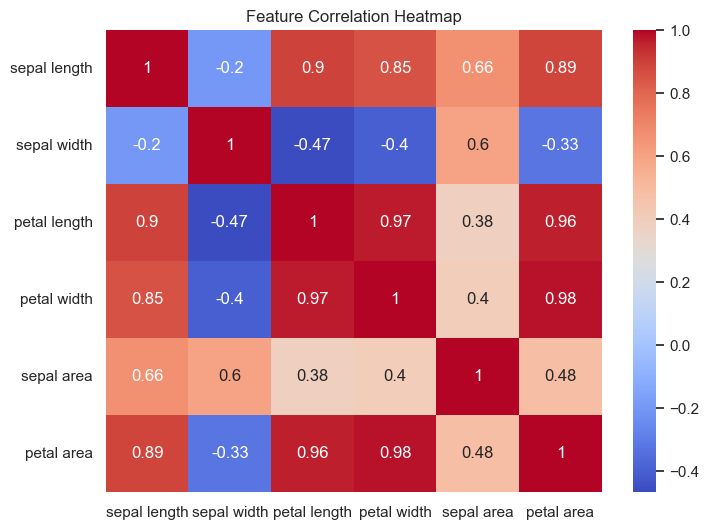

In [83]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.drop(columns='label').corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Feature Correlation Heatmap")
plt.show()


**Drop correlated columns**

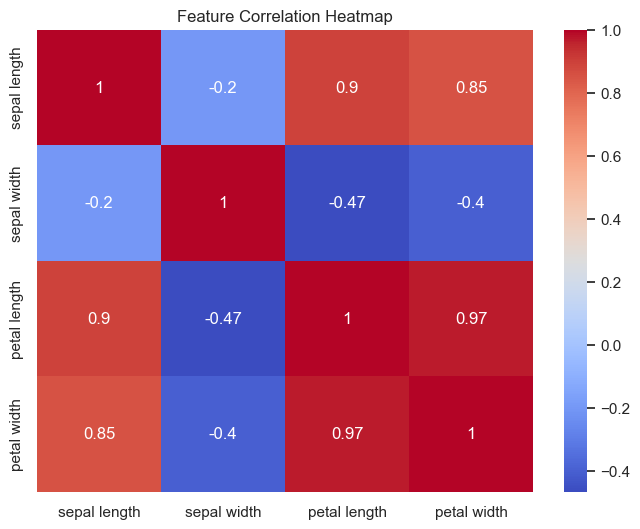

In [84]:
# Remove area features for clearer correlation heatmap
df = df.drop(columns=['sepal area','petal area'])
# Re-plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.drop(columns='label').corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Feature Correlation Heatmap")
plt.show()


**PCA**

In [85]:
# Scale features
X = df.drop(columns='label')
y = df['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y.values


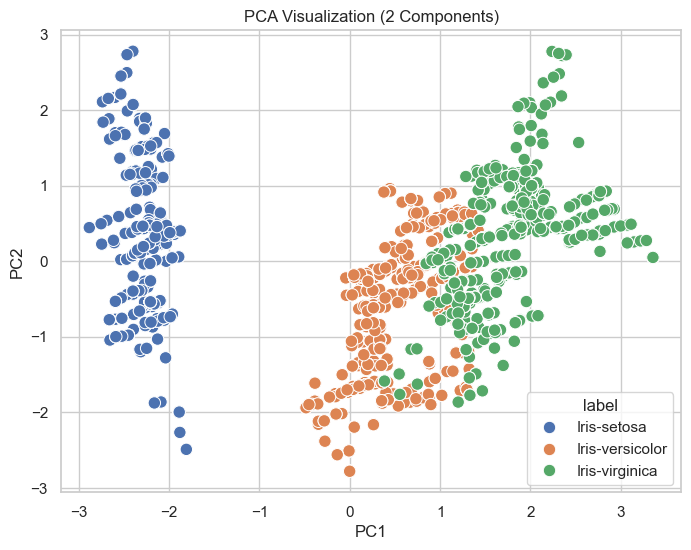

In [86]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='label',
    s=80
)
plt.title("PCA Visualization (2 Components)")
plt.show()


In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 2400 samples
Testing set size: 600 samples


**logistic Regression**

In [88]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 1.0


**KNN**

In [89]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.9966666666666667


**Confussion Matrix KNN**

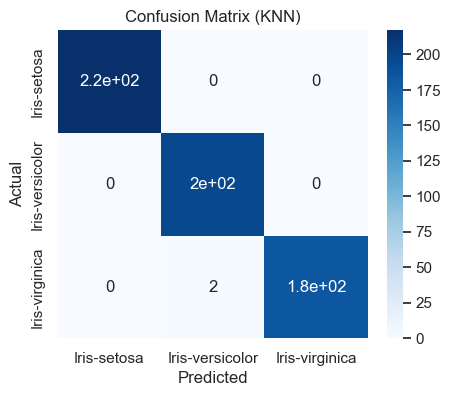

In [90]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=df.label.unique(),
            yticklabels=df.label.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (KNN)")
plt.show()

**Support Vector machine**

In [91]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 1.0


**Confusson Matrix SVM**

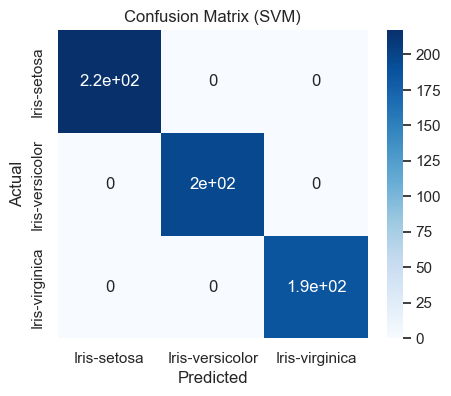

In [92]:
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=df.label.unique(),
            yticklabels=df.label.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()

**Decision Boundary Visualization (2 Features)**

In [93]:
le = LabelEncoder()
y_encoded = le.fit_transform(df['label'])


In [94]:
X_2 = df[['petal length', 'petal width']].values
y_2 = y_encoded

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X_2, y_2, test_size=0.2, random_state=42
)

svm_2d = SVC(kernel='linear')
svm_2d.fit(X2_train, y2_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [96]:
import numpy as np

x_min, x_max = X_2[:, 0].min() - 1, X_2[:, 0].max() + 1
y_min, y_max = X_2[:, 1].min() - 1, X_2[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)


In [97]:
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


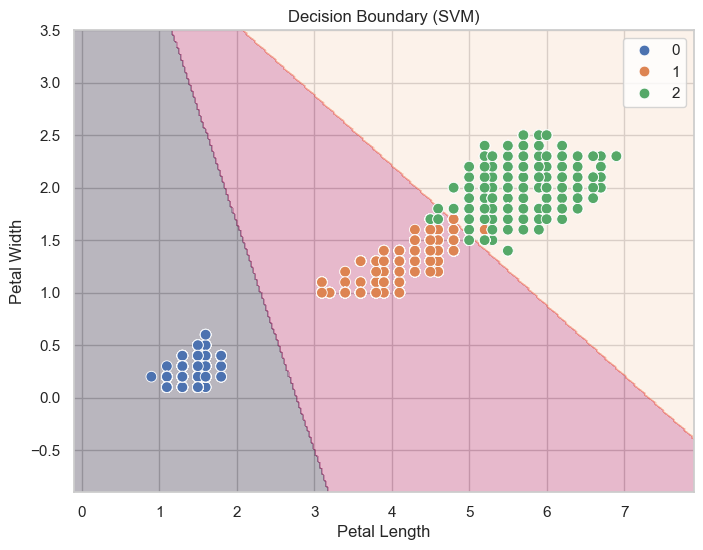

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)

sns.scatterplot(
    x=X_2[:, 0],
    y=X_2[:, 1],
    hue=y_2,
    palette='deep',
    s=60
)

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Decision Boundary (SVM)")
plt.show()


**Comparision of Diffrent Models**

In [99]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM (Linear)": SVC(kernel='linear')
}

accuracies = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"{name} Accuracy: {acc:.2f}")


Logistic Regression Accuracy: 1.00
KNN Accuracy: 1.00
SVM (Linear) Accuracy: 1.00
